**✅Projet 1 — Prédiction de la fraude bancaire avec XGBoost**

Objectif : Détecter les transactions frauduleuses sur carte bancaire

Techniques : XGBoost, SMOTE, GridSearch, AUC-ROC

📦 Dataset :
Credit Card Fraud Detection

🔧 Tâches :

•	Analyse EDA

•	SMOTE pour équilibrer

•	XGBoost tuning

•	Explication des variables importantes

•	Visualisation ROC + confusion matrix



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ai/creditcard.csv")

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


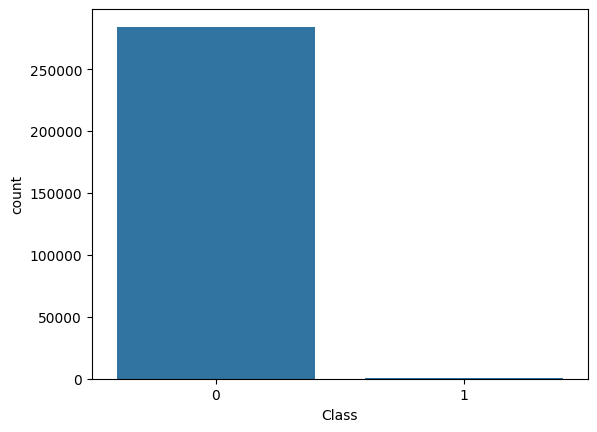

In [ ]:
sns.countplot(x='Class', data=df)
plt.show()
#il y a un déséquilibre

In [ ]:
print(df.describe())
# remarque : pas de valeurs manquantes
#count : nombre de valeurs non manquantes.
#moyenne de la colonne.
#std (standard deviation) : écart-type, mesure de dispersion.
#min et max : valeurs minimale et maximale.
#25%, 50%, 75% (quartiles) : valeurs qui divisent la distribution. par exemple 75% des transactions ≤ 77

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
#Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# SMOTE pour équilibrage
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Avant SMOTE:", y_train.value_counts())
print("Après SMOTE:", y_train_res.value_counts())

Avant SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
Après SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
# Modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1) #Méthode pour optimiser les hyperparamètres d’un modèle
#roc_auc : C’est une mesure de performance pour les modèles de classification, surtout avec des classes déséquilibrées.
#ROC : graphique qui compare taux de vrais positifs (sensibilité) et taux de faux positifs.
#AUC : surface sous la courbe ROC.
#Valeur proche de 1 → modèle excellent
#Valeur proche de 0.5 → modèle aléatoire
grid.fit(X_train_res, y_train_res)

print("Meilleurs paramètres:", grid.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:34:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:,1]
#La méthode predict_proba d’un modèle de classification binaire retourne la probabilité que chaque exemple appartienne à chaque classe.


In [ ]:
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
#Precision (Précision) : % de prédictions positives correctes parmi toutes les prédictions
#Recall (Rappel / Sensibilité): % de vrais positifs détectés
#F1-score : Moyenne harmonique précision/rappel
#Support: Nombre de vrais exemples dans la classe


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



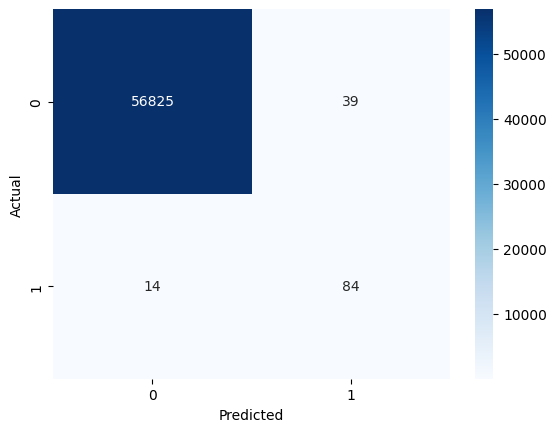

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

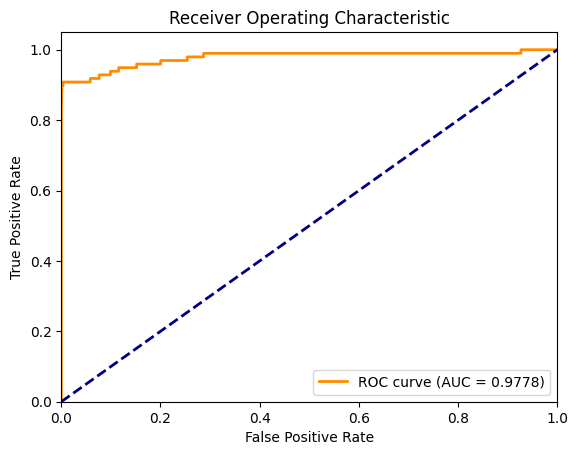

In [ ]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
#0.9778 modele presque parfait

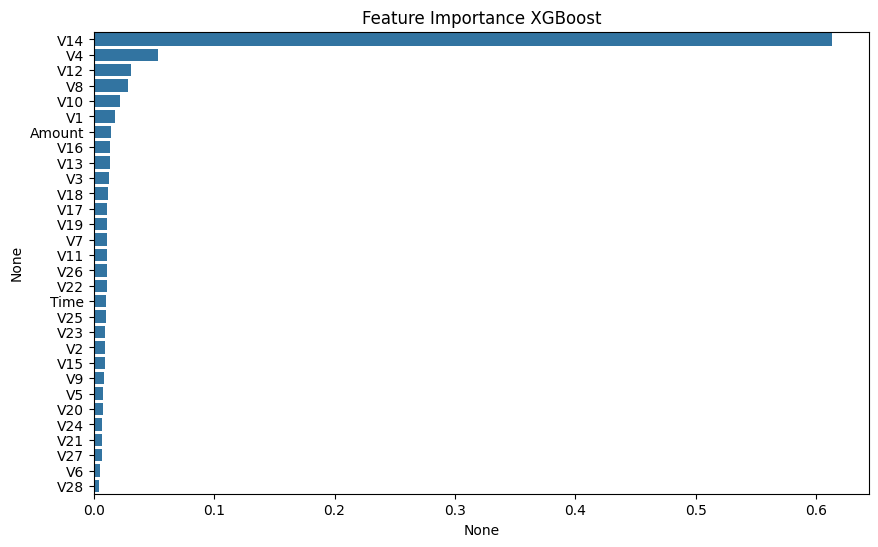

In [ ]:
# Feature importance
importances = grid.best_estimator_.feature_importances_
feature_names = df.drop('Class', axis=1).columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance XGBoost")
plt.show()
# v14 a le plus d’influence sur les prédictions du modèle XGBoost